In [2]:
# import libraries
from patchify import patchify, unpatchify
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import img_as_ubyte, exposure, io
import cv2
import os
from datetime import datetime

In [5]:
%%time

image = r"C:\Users\agyei\OneDrive - sarkodie\Working Projects\SisMON\Image Processing\image_patches\images\S1A_IW_GRDH_1SDV_20150419T155633_20150419T155658_005555_0071AF_7CF1_Orb_NR_Cal_EC.tiff"
full_img = io.imread(image)


# print(full_img.shape, full_img.dtype, type(full_img))
h, w = full_img.shape[0], full_img.shape[1]

threshold = 0.04
full_img[full_img > threshold] = threshold

# # # display image
# # plt.figure(figsize=(10,10))
# # plt.imshow(full_img, cmap='gray') # display the image
# # plt.axis('off')
# # plt.show()


# patches with overlap patch_size > step_size

# # patch and step sizes
patch_size = 4096
step_size= (2048, 2048)

# padding image before creating patches in order to cover entire image

# Pad the image with zeros
img_padded = np.pad(full_img, ((0, patch_size - full_img.shape[0] % patch_size),
                           (0, patch_size - full_img.shape[1] % patch_size)), mode='constant')



# Extract patches using patchify
patches_padded = patchify(img_padded, (patch_size, patch_size), step=step_size)
patches_padded.shape

# # displaying patches
# fig, ax = plt.subplots(patches_padded.shape[0], patches_padded.shape[1], figsize=(8,8), facecolor='gray')
# for i in range(patches_padded.shape[0]):
#     for j in range(patches_padded.shape[1]):
#         ax[i][j].imshow(patches_padded[i][j], cmap='gray')
#         ax[i][j].axis('off')
#         plt.subplots_adjust(wspace=0.1, hspace=0.1)
#         plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Save patches to folder

# Set the folder path
folder_path = 'images/padded_overlap2/'

# Check if the folder exists, create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Set the threshold value
thresh = 50

for i in range(patches_padded.shape[0]):
    for j in range(patches_padded.shape[1]):
        single_patch_img = patches_padded[i, j, :, :]
        
        # Apply thresholding to enhance contrast
        single_patch_img[single_patch_img > thresh] = thresh
        
        # Normalize the image
        single_patch_img = cv2.normalize(single_patch_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        
        # Save the image
        if not cv2.imwrite(folder_path + 'image_' + '_' + str(i) + str(j) + '.jpg', single_patch_img):
            raise Exception("Could not write the image")         

CPU times: total: 36 s
Wall time: 1min 29s


CPU times: total: 40.8 s
Wall time: 3min 46s


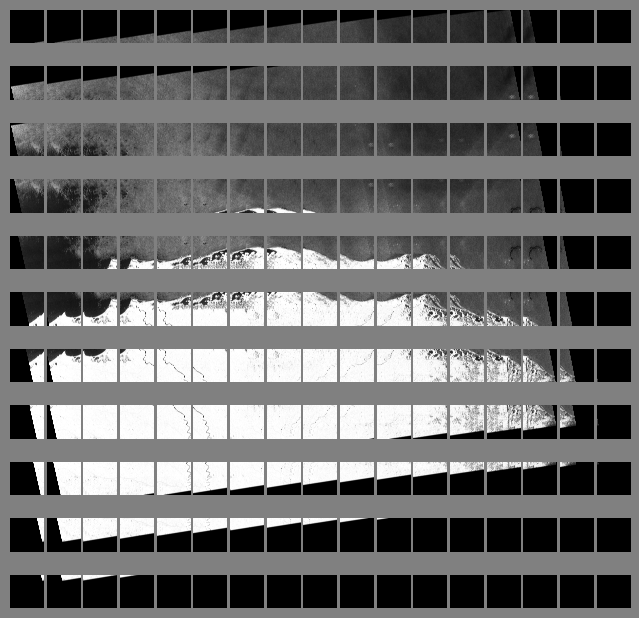

In [6]:
%%time

image = r"C:\Users\agyei\OneDrive - sarkodie\Working Projects\SisMON\Image Processing\image_patches\images\S1A_IW_GRDH_1SDV_20150419T155633_20150419T155658_005555_0071AF_7CF1_Orb_NR_Cal_EC.tiff"
full_img = io.imread(image)



# print(full_img.shape, full_img.dtype, type(full_img))
h, w = full_img.shape[0], full_img.shape[1]

threshold = 0.04
full_img[full_img > threshold] = threshold

# # # display image
# # plt.figure(figsize=(10,10))
# # plt.imshow(full_img, cmap='gray') # display the image
# # plt.axis('off')
# # plt.show()


# patches with overlap patch_size > step_size

# # patch and step sizes
patch_size = 4096
step_size= (2048, 2048)

# padding image before creating patches in order to cover entire image

# Pad the image with zeros
img_padded = np.pad(full_img, ((0, patch_size - full_img.shape[0] % patch_size),
                           (0, patch_size - full_img.shape[1] % patch_size)), mode='constant')



# Extract patches using patchify
patches_padded = patchify(img_padded, (patch_size, patch_size), step=step_size)
patches_padded.shape

# displaying patches
fig, ax = plt.subplots(patches_padded.shape[0], patches_padded.shape[1], figsize=(8,8), facecolor='gray')
for i in range(patches_padded.shape[0]):
    for j in range(patches_padded.shape[1]):
        ax[i][j].imshow(patches_padded[i][j], cmap='gray')
        ax[i][j].axis('off')
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Save patches to folder

# Set the folder path
folder_path = 'images/padded_overlap2/'

# Check if the folder exists, create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Set the threshold value
thresh = 50

for i in range(patches_padded.shape[0]):
    for j in range(patches_padded.shape[1]):
        single_patch_img = patches_padded[i, j, :, :]
        
        # Apply thresholding to enhance contrast
        single_patch_img[single_patch_img > thresh] = thresh
        
        # Normalize the image
        single_patch_img = cv2.normalize(single_patch_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        
        # Save the image
        if not cv2.imwrite(folder_path + 'image_' + '_' + str(i) + str(j) + '.jpg', single_patch_img):
            raise Exception("Could not write the image") 

In [ ]:
import os
import cv2
import numpy as np
from skimage import io
from patchify import patchify

def extract_and_save_patches(image_path, patch_size, step_size, threshold, folder_path, thresh):
    # Load the image
    full_img = io.imread(image_path)

    # Preprocess the image by setting values above threshold to threshold
    full_img[full_img > threshold] = threshold

    # Get the image dimensions
    h, w = full_img.shape[0], full_img.shape[1]

    # Pad the image to cover the entire image with patches
    img_padded = np.pad(full_img, ((0, patch_size - h % patch_size),
                                   (0, patch_size - w % patch_size)), mode='constant')

    # Extract patches using patchify
    patches_padded = patchify(img_padded, (patch_size, patch_size), step=step_size)

    # Check if the folder exists, create it if not
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Save patches to folder
    for i in range(patches_padded.shape[0]):
        for j in range(patches_padded.shape[1]):
            single_patch_img = patches_padded[i, j, :, :]

            # Apply thresholding to enhance contrast
            single_patch_img[single_patch_img > thresh] = thresh

            # Normalize the image
            single_patch_img = cv2.normalize(single_patch_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

            # Save the image
            if not cv2.imwrite(folder_path + 'image_' + '_' + str(i) + str(j) + '.jpg', single_patch_img):
                raise Exception("Could not write the image")

    print("Patches extracted and saved successfully!")

# Usage example
image_path = r"C:\Users\agyei\OneDrive - sarkodie\Working Projects\SisMON\Image Processing\image_patches\images\S1A_IW_GRDH_1SDV_20150419T155633_20150419T155658_005555_0071AF_7CF1_Orb_NR_Cal_EC.tiff"
patch_size = 4096
step_size = (2048, 2048)
threshold = 0.04
folder_path = 'images/padded_overlap2/'
thresh = 50

extract_and_save_patches(image_path, patch_size, step_size, threshold, folder_path, thresh)


In [ ]:
import os
import cv2
import numpy as np
from skimage import io
from patchify import patchify

def extract_and_save_patches(image_path, patch_size, step_size, threshold, folder_path, thresh):
    # Load the image
    full_img = io.imread(image_path)

    # Preprocess the image by setting values above threshold to threshold
    full_img[full_img > threshold] = threshold

    # Get the image dimensions
    h, w = full_img.shape[0], full_img.shape[1]

    # Check if padding is necessary
    if h % patch_size != 0 or w % patch_size != 0:
        # Pad the image to cover the entire image with patches
        img_padded = np.pad(full_img, ((0, patch_size - h % patch_size),
                                       (0, patch_size - w % patch_size)), mode='constant')
        
        # Update the image dimensions
        h_padded, w_padded = img_padded.shape[0], img_padded.shape[1]
        
        # Extract patches using patchify
        patches_padded = patchify(img_padded, (patch_size, patch_size), step=step_size)
        
        # Iterate over the patches and save them
        for i in range(patches_padded.shape[0]):
            for j in range(patches_padded.shape[1]):
                single_patch_img = patches_padded[i, j, :, :]
                
                # Apply thresholding to enhance contrast
                single_patch_img[single_patch_img > thresh] = thresh
                
                # Normalize the image
                single_patch_img = cv2.normalize(single_patch_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
                
                # Save the image
                if not cv2.imwrite(folder_path + 'image_' + '_' + str(i) + str(j) + '.jpg', single_patch_img):
                    raise Exception("Could not write the image")
    else:
        # Extract patches using patchify directly without padding
        patches = patchify(full_img, (patch_size, patch_size), step=step_size)
        
        # Iterate over the patches and save them
        for i in range(patches.shape[0]):
            for j in range(patches.shape[1]):
                single_patch_img = patches[i, j, :, :]
                
                # Apply thresholding to enhance contrast
                single_patch_img[single_patch_img > thresh] = thresh
                
                # Normalize the image
                single_patch_img = cv2.normalize(single_patch_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
                
                # Save the image
                if not cv2.imwrite(folder_path + 'image_' + '_' + str(i) + str(j) + '.jpg', single_patch_img):
                    raise Exception("Could not write the image")

    print("Patches extracted and saved successfully!")

# Usage example
image_path = r"C:\Users\agyei\OneDrive - sarkodie\Working Projects\SisMON\Image Processing\image_patches\images\S1A_IW_GRDH_1SDV_20150419T155633_20150419T155658_005555_0071AF_7CF1_Orb_NR_Cal_EC.tiff"
patch_size = 4096
step_size = (2048, 2048)
threshold = 0.04
folder_path = 'images/padded_overlap2/'
thresh = 50

extract_and_save_patches(image_path, patch_size, step_size, threshold, folder_path, thresh)


The default step size used by the code is (patch_size, patch_size). This means that when extracting patches, the code moves patch_size pixels vertically and patch_size pixels horizontally to determine the starting position of the next patch.

When the overlap parameter is set to True, the provided step_size is used. For example, if step_size is (2048, 2048), the code will move 2048 pixels vertically and 2048 pixels horizontally to determine the starting position of the next patch. This results in overlapping patches.

On the other hand, when the overlap parameter is set to False, the default step size of (patch_size, patch_size) is used. Since the step size is equal to the patch size, the code will move exactly one patch size vertically and one patch size horizontally to determine the starting position of the next patch. This ensures non-overlapping patches.

In both cases, the patch size determines the dimensions of the individual patches, and the step size determines the distance between the starting positions of adjacent patches. The code uses these parameters to systematically extract patches from the input image, either with or without overlap, based on the user's preference.

In [1]:
import os
import cv2
import numpy as np
from skimage import io
from patchify import patchify

def extract_and_save_patches(image_path, patch_size, step_size, threshold, folder_path, thresh, overlap=True):
    # Load the image
    full_img = io.imread(image_path)

    # Preprocess the image by setting values above threshold to threshold
    full_img[full_img > threshold] = threshold

    # Get the image dimensions
    h, w = full_img.shape[0], full_img.shape[1]

    # Check if padding is necessary
    if h % patch_size != 0 or w % patch_size != 0:
        # Pad the image to cover the entire image with patches
        img_padded = np.pad(full_img, ((0, patch_size - h % patch_size),
                                       (0, patch_size - w % patch_size)), mode='constant')
        
        # Update the image dimensions
        h_padded, w_padded = img_padded.shape[0], img_padded.shape[1]
        
        # Extract patches using patchify
        if overlap:
            patches_padded = patchify(img_padded, (patch_size, patch_size), step=step_size)
        else:
            patches_padded = patchify(img_padded, (patch_size, patch_size))
        
        # Iterate over the patches and save them
        for i in range(patches_padded.shape[0]):
            for j in range(patches_padded.shape[1]):
                single_patch_img = patches_padded[i, j, :, :]
                
                # Apply thresholding to enhance contrast
                single_patch_img[single_patch_img > thresh] = thresh
                
                # Normalize the image
                single_patch_img = cv2.normalize(single_patch_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
                
                # Save the image
                if not cv2.imwrite(folder_path + 'image_' + '_' + str(i) + str(j) + '.jpg', single_patch_img):
                    raise Exception("Could not write the image")
    else:
        # Extract patches using patchify directly without padding
        if overlap:
            patches = patchify(full_img, (patch_size, patch_size), step=step_size)
        else:
            patches = patchify(full_img, (patch_size, patch_size))
        
        # Iterate over the patches and save them
        for i in range(patches.shape[0]):
            for j in range(patches.shape[1]):
                single_patch_img = patches[i, j, :, :]
                
                # Apply thresholding to enhance contrast
                single_patch_img[single_patch_img > thresh] = thresh
                
                # Normalize the image
                single_patch_img = cv2.normalize(single_patch_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
                
                # Save the image
                if not cv2.imwrite(folder_path + 'image_' + '_' + str(i) + str(j) + '.jpg', single_patch_img):
                    raise Exception("Could not write the image")

    print("Patches extracted and saved successfully!")

# Usage example
image_path = r"C:\Users\agyei\OneDrive - sarkodie\Working Projects\SisMON\Image Processing\image_patches\images\S1A_IW_GRDH_1SDV_20150419T155633_20150419T155658_005555_0071AF_7CF1_Orb_NR_Cal_EC.tiff"
patch_size = 4096
step_size = (2048, 2048)
threshold = 0.04
folder_path = 'images/padded_overlap2/'
thresh = 50
overlap = True  # Set to True for overlapping patches, False for non-overlapping patches

extract_and_save_patches(image_path, patch_size, step_size, threshold, folder_path, thresh, overlap)


KeyboardInterrupt: 